Connected to Python 3.13.5

In [ ]:
train = pd.read_csv("./data/train.csv")

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("./data/train.csv")

<ipython-input-3-9ac7e7d1f554>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./data/train.csv")


<ipython-input-4-3016542f7b52>:8: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./data/train.csv")


=== 데이터 기본 정보 ===
전체 데이터 수: 73612
양품(0) 개수: 70333
불량품(1) 개수: 3279
불량률: 4.45%

=== 결측값 확인 ===
working                    1
emergency_stop             1
molten_temp             2261
low_section_speed          1
high_section_speed         1
molten_volume          34992
cast_pressure              1
biscuit_thickness          1
upper_mold_temp1           1
upper_mold_temp2           1
upper_mold_temp3         313
lower_mold_temp1           1
lower_mold_temp2           1
lower_mold_temp3         313
sleeve_temperature         1
physical_strength          1
Coolant_temperature        1
tryshot_signal         72368
heating_furnace        40881
dtype: int64

=== 1. 피어슨 상관계수 분석 ===
                              변수    상관계수     절대값
7                  cast_pressure -0.7604  0.7604
13              lower_mold_temp2 -0.2292  0.2292
12              lower_mold_temp1 -0.2213  0.2213
10              upper_mold_temp2 -0.2169  0.2169
9               upper_mold_temp1 -0.2097  0.2097
8              biscuit_th

<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:122: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

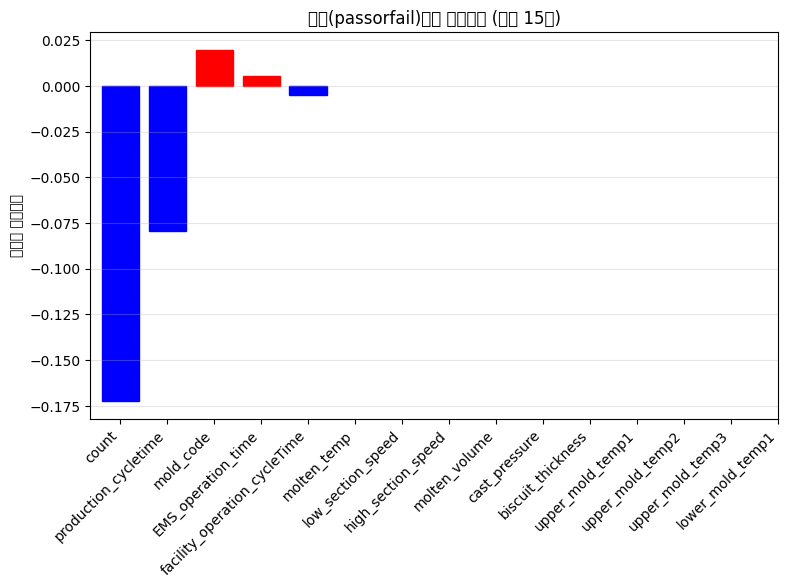

<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 47533 (\N{HANGUL SYLLABLE RIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-3016542f7b52>:140: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

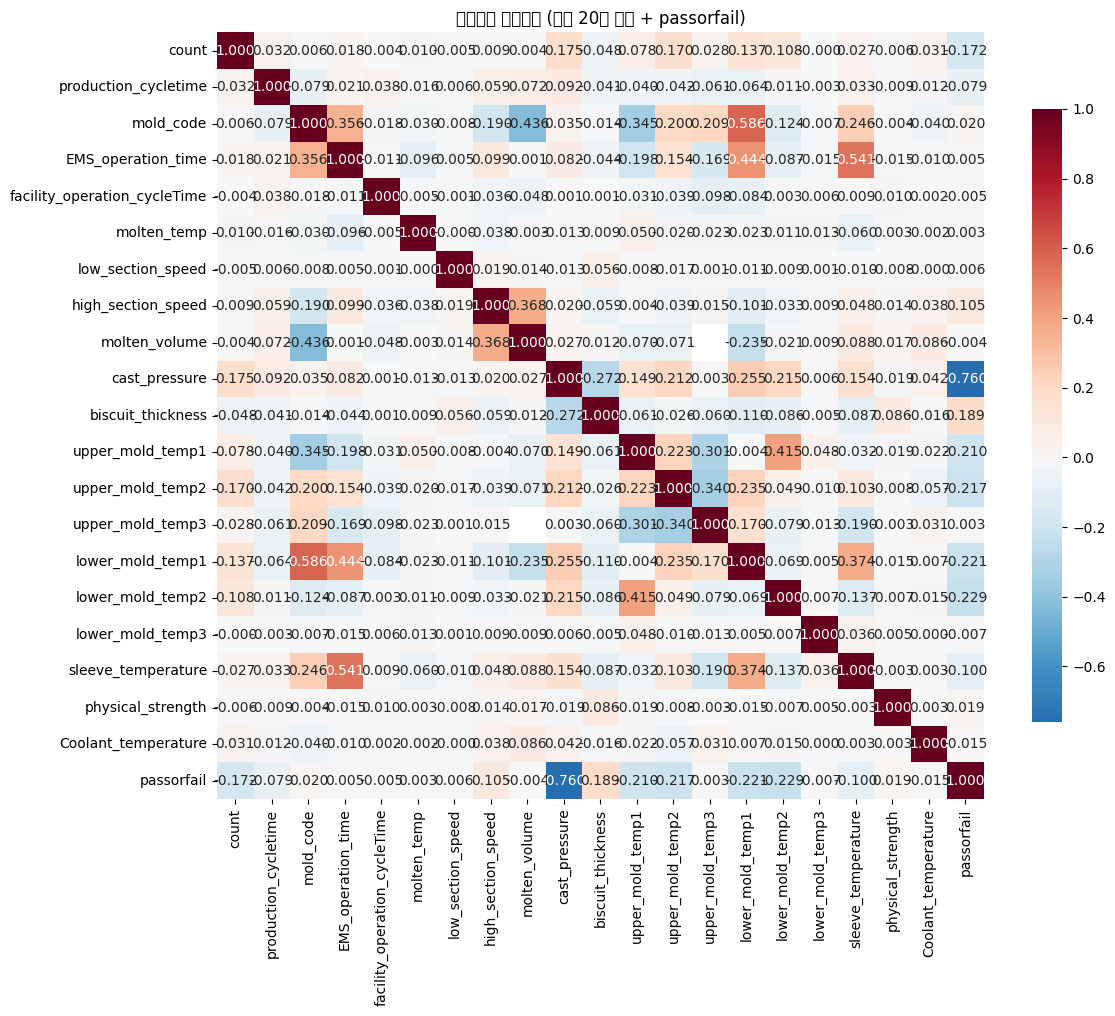


=== 분석 요약 ===
1. 상관계수의 절대값이 클수록 품질과 더 강한 관계가 있음
2. 양의 상관관계: 값이 클수록 불량품일 가능성이 높음
3. 음의 상관관계: 값이 클수록 양품일 가능성이 높음
4. p-value < 0.05인 경우 통계적으로 유의한 관계

=== 품질에 가장 영향을 주는 상위 5개 변수 ===
count: 상관계수 -0.1725 (불량 감소)
production_cycletime: 상관계수 -0.0792 (불량 감소)
mold_code: 상관계수 0.0198 (불량 증가)
EMS_operation_time: 상관계수 0.0055 (불량 증가)
facility_operation_cycleTime: 상관계수 -0.0048 (불량 감소)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드 및 전처리
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train = train.drop(['id', 'line', 'name', 'mold_name', 'time', 'date', 'registration_time'], axis=1)

print("=== 데이터 기본 정보 ===")
print(f"전체 데이터 수: {len(train)}")
print(f"양품(0) 개수: {sum(train['passorfail'] == 0)}")
print(f"불량품(1) 개수: {sum(train['passorfail'] == 1)}")
print(f"불량률: {sum(train['passorfail'] == 1) / len(train) * 100:.2f}%")

print("\n=== 결측값 확인 ===")
missing_values = train.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("결측값이 없습니다.")

# 1. 피어슨 상관계수 분석
print("\n=== 1. 피어슨 상관계수 분석 ===")
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('passorfail')

correlations = []
for col in numeric_columns:
    if train[col].dtype in ['int64', 'float64']:
        corr_coef = train[col].corr(train['passorfail'])
        correlations.append({'변수': col, '상관계수': corr_coef, '절대값': abs(corr_coef)})

correlation_df = pd.DataFrame(correlations).sort_values('절대값', ascending=False)
print(correlation_df.round(4))

# 2. 점이연 상관계수 (Point-biserial correlation) - 더 정확한 방법
print("\n=== 2. 점이연 상관계수 분석 ===")
pb_correlations = []
for col in numeric_columns:
    if train[col].dtype in ['int64', 'float64']:
        # 양품과 불량품 그룹으로 나누기
        good_products = train[train['passorfail'] == 0][col]
        defective_products = train[train['passorfail'] == 1][col]
        
        # 점이연 상관계수 계산
        pb_corr = stats.pointbiserialr(train['passorfail'], train[col])[0]
        p_value = stats.pointbiserialr(train['passorfail'], train[col])[1]
        
        pb_correlations.append({
            '변수': col, 
            '점이연상관계수': pb_corr, 
            'p-value': p_value,
            '절대값': abs(pb_corr),
            '유의성': 'significant' if p_value < 0.05 else 'not significant'
        })

pb_correlation_df = pd.DataFrame(pb_correlations).sort_values('절대값', ascending=False)
print(pb_correlation_df.round(4))

# 3. 각 변수별 양품/불량품 평균 비교
print("\n=== 3. 양품/불량품 평균 비교 (상위 10개 변수) ===")
top_10_vars = pb_correlation_df.head(10)['변수'].tolist()

comparison_results = []
for col in top_10_vars:
    good_mean = train[train['passorfail'] == 0][col].mean()
    defect_mean = train[train['passorfail'] == 1][col].mean()
    diff_pct = ((defect_mean - good_mean) / good_mean * 100) if good_mean != 0 else 0
    
    comparison_results.append({
        '변수': col,
        '양품_평균': good_mean,
        '불량품_평균': defect_mean,
        '차이(%)': diff_pct
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.round(3))

# 4. t-검정으로 유의성 확인 (상위 10개 변수)
print("\n=== 4. t-검정 결과 (상위 10개 변수) ===")
ttest_results = []
for col in top_10_vars:
    good_data = train[train['passorfail'] == 0][col].dropna()
    defect_data = train[train['passorfail'] == 1][col].dropna()
    
    t_stat, p_val = stats.ttest_ind(good_data, defect_data)
    
    ttest_results.append({
        '변수': col,
        't-통계량': t_stat,
        'p-value': p_val,
        '유의성': 'significant' if p_val < 0.05 else 'not significant'
    })

ttest_df = pd.DataFrame(ttest_results)
print(ttest_df.round(6))

# 5. 상관관계 시각화
plt.figure(figsize=(15, 10))

# 상위 15개 변수의 상관계수 막대그래프
top_15_vars = pb_correlation_df.head(15)
plt.subplot(2, 2, 1)
bars = plt.bar(range(len(top_15_vars)), top_15_vars['점이연상관계수'])
plt.xticks(range(len(top_15_vars)), top_15_vars['변수'], rotation=45, ha='right')
plt.ylabel('점이연 상관계수')
plt.title('품질(passorfail)과의 상관관계 (상위 15개)')
plt.grid(axis='y', alpha=0.3)

# 양의 상관관계는 빨간색, 음의 상관관계는 파란색으로 색칠
for i, bar in enumerate(bars):
    if top_15_vars.iloc[i]['점이연상관계수'] > 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.tight_layout()
plt.show()

# 6. 히트맵으로 전체 상관관계 매트릭스 표시 (상위 20개 변수)
top_20_vars = pb_correlation_df.head(20)['변수'].tolist()
selected_data = train[top_20_vars + ['passorfail']]

plt.figure(figsize=(12, 10))
correlation_matrix = selected_data.corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('상관관계 매트릭스 (상위 20개 변수 + passorfail)')
plt.tight_layout()
plt.show()

print("\n=== 분석 요약 ===")
print("1. 상관계수의 절대값이 클수록 품질과 더 강한 관계가 있음")
print("2. 양의 상관관계: 값이 클수록 불량품일 가능성이 높음")
print("3. 음의 상관관계: 값이 클수록 양품일 가능성이 높음")
print("4. p-value < 0.05인 경우 통계적으로 유의한 관계")

# 가장 중요한 변수들 요약
print(f"\n=== 품질에 가장 영향을 주는 상위 5개 변수 ===")
top_5 = pb_correlation_df.head(5)
for idx, row in top_5.iterrows():
    direction = "불량 증가" if row['점이연상관계수'] > 0 else "불량 감소"
    print(f"{row['변수']}: 상관계수 {row['점이연상관계수']:.4f} ({direction})")